## Import necessary libraries

In [53]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

## 1 - Understanding FFT and Windowing Effects

### Define two frequencies for the signals

In [54]:
f1 = 5      # Frequency of the first signal in Hz
f2 = 5.5    # Frequency of the second signal in Hz
print(f"f1: {f1}, f2: {f2}")

f1: 5, f2: 5.5


### Define functions to generate cosine waves

In [55]:

def x1(t):
    return np.cos(2 * np.pi * f1 * t)   # Generates a cosine wave with frequency f1.

def x2(t):
    return np.cos(2 * np.pi * f2 * t)   # Generates a cosine wave with frequency f2.

### Define the sampling frequency

In [56]:
fs = 20

### --- Case A: Long signal duration (20 seconds) ---

In [57]:
T_a = 20    # Total time duration for signal A in seconds

### Generate time points for signal A

### np.arange(start, stop, step) creates an array of evenly spaced values
### 1/fs is the time step (sampling period)

In [58]:
x_points_a = np.arange(0, T_a, 1/fs)

### Generate y-values (amplitude) for both signals over time x_points_a

In [59]:
y1_points_a = x1(x_points_a)    # Signal 1 with f1

In [60]:
y2_points_a = x2(x_points_a)    # Signal 2 with f2

### --- Case B: Short signal duration (2 seconds) ---

In [61]:
T_b = 2    # Total time duration for signal B in seconds

### Generate time points for signal B

In [62]:
x_points_b = np.arange(0, T_b, 1/fs)

### Generate y-values (amplitude) for both signals over time x_points_b

In [63]:
y1_points_b = x1(x_points_b)    # Signal 1 with f1

In [64]:
y2_points_b = x2(x_points_b)    # Signal 2 with f2

## FFT calculation

### The Fast Fourier Transform (FFT) is an algorithm that computes the
### Discrete Fourier Transform (DFT) of a sequence, or its inverse (IFFT).
### It's used to convert a signal from its original domain (often time or space)
### to a representation in the frequency domain.


## Calculate FFT for all four signals

In [65]:
y1_a_fft = sp.fft.fft(y1_points_a)  # FFT of y1_points_a (5 Hz, 20s)
y2_a_fft = sp.fft.fft(y2_points_a)  # FFT of y2_points_a (5.5 Hz, 20s)
y1_b_fft = sp.fft.fft(y1_points_b)  # FFT of y1_points_b (5 Hz, 2s)
y2_b_fft = sp.fft.fft(y2_points_b)  # FFT of y2_points_b (5.5 Hz, 2s)

### Get the number of points (length) of the FFT results for case A

In [66]:
n_a = len(y1_a_fft)
print(n_a)

400


### Get the number of points (length) of the FFT results for case B

In [67]:
n_b = len(y1_b_fft)
print(n_b)

40


### Define the timestep (sampling period)

In [68]:
timestep = 1/fs

### Calculate the frequencies corresponding to the FFT points for case A

### sp.fft.fftfreq generates the DFT sample frequencies.
### The first argument is the window length (n_a), and d is the sample spacing.

In [69]:
freq_a = sp.fft.fftfreq(n_a, d=timestep)

### Calculate the frequencies corresponding to the FFT points for case B

In [70]:
freq_b = sp.fft.fftfreq(n_b, d=timestep)

### FFT results are symmetric, so we only need the positive frequencies (first half)

In [71]:
pos_freq_a = freq_a[:n_a//2]
pos_freq_b = freq_b[:n_b//2]

### Calculate the magnitude of the FFT results and normalize

### We take the absolute value of the FFT output to get the magnitude.
### We normalize by dividing by the number of points (n_a or n_b) to get the amplitude.
### We only consider the first half of the points (positive frequencies).

In [72]:
mag_y1_a = np.abs(y1_a_fft[:n_a//2]) / n_a
mag_y2_a = np.abs(y2_a_fft[:n_a//2]) / n_a
mag_y1_b = np.abs(y1_b_fft[:n_b//2]) / n_b
mag_y2_b = np.abs(y2_b_fft[:n_b//2]) / n_b

## Plot the FFT results

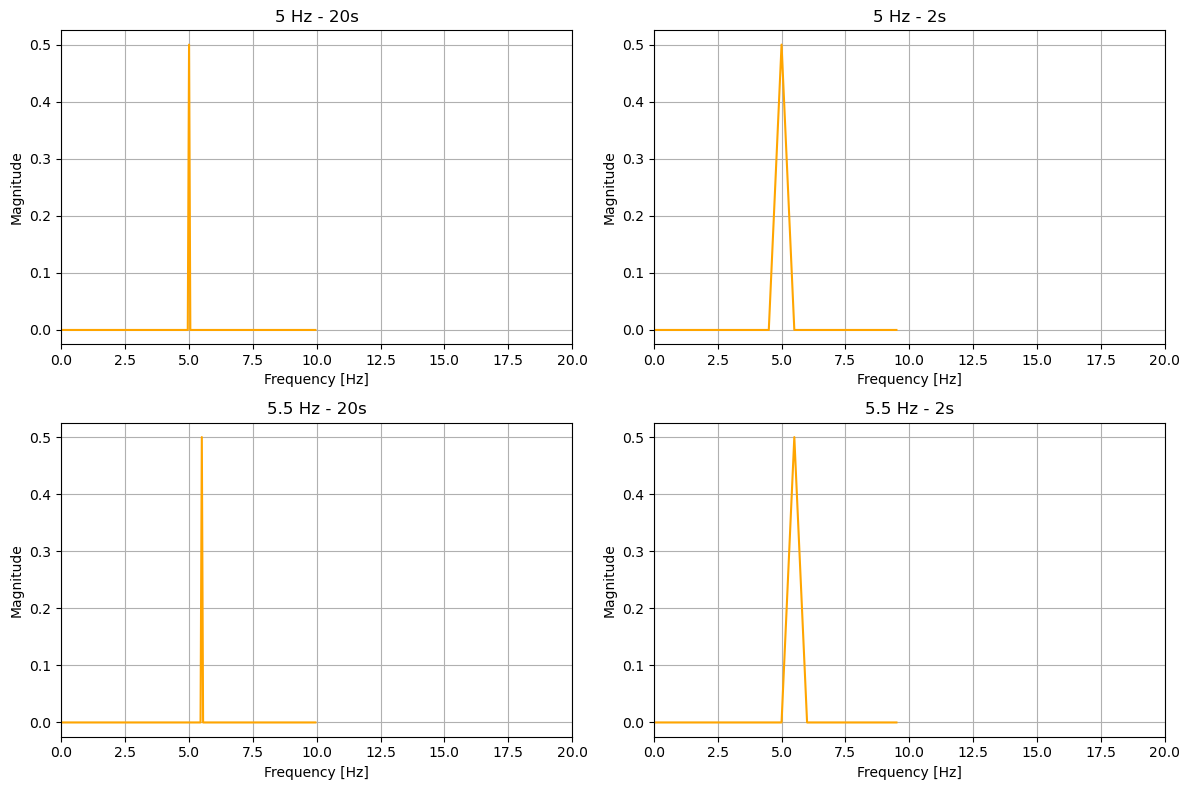

In [73]:
plt.figure(figsize=(12, 8))

# Subplot 1: 5 Hz signal, 20s duration
plt.subplot(2, 2, 1)
plt.plot(pos_freq_a, mag_y1_a, color='orange')
plt.grid(True)
plt.title('5 Hz - 20s')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 20)    # Limit x-axis to see relevant frequencies

# Subplot 2: 5 Hz signal, 2s duration
plt.subplot(2, 2, 2)
plt.plot(pos_freq_b, mag_y1_b, color='orange')
plt.grid(True)
plt.title('5 Hz - 2s')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 20)

# Subplot 3: 5.5 Hz signal, 20s duration
plt.subplot(2, 2, 3)
plt.plot(pos_freq_a, mag_y2_a, color='orange')
plt.grid(True)
plt.title('5.5 Hz - 20s')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 20)

# Subplot 4: 5.5 Hz signal, 2s duration
plt.subplot(2, 2, 4)
plt.plot(pos_freq_b, mag_y2_b, color='orange')
plt.grid(True)
plt.title('5.5 Hz - 2s')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(0, 20)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Comments

### - Short windows (2s vs 20s) make the spectrum spread out (spectral leakage).
###   The main lobe of the frequency peak becomes wider, and side lobes might appear or become more prominent.
###   This is because a shorter time window provides less information about the signal's frequency content,
###   leading to lower frequency resolution.
### - The 5.5 Hz signal shows more leakage compared to the 5 Hz signal, especially with the 20 Hz sampling rate.
###   This is because 5 Hz is a multiple of the frequency resolution for longer windows (fs/N = 20/400 = 0.05 Hz for 20s, fs/N = 20/40 = 0.5 Hz for 2s).
###   A frequency that is not an exact multiple of the DFT bin resolution will have its energy spread across multiple bins,
###   an effect known as spectral leakage. 5.5 Hz does not fit perfectly into an integer number of cycles within the
###   time window if the window length isn't chosen carefully with respect to 1/5.5, leading to discontinuity at the window edges.


## 2 - Understanding Zero-Padding in FFT

### Define the signal frequency

In [74]:
f = 5 # Hz

### Define the function to generate the cosine wave

In [75]:
def x(t):
    return np.cos(2 * np.pi * f * t)    # Generates a cosine wave with frequency f1.

### Define sampling frequency and signal duration

In [76]:
fs = 20    # Sampling frequency in Hz
T = 20     # Signal duration in seconds

### Generate time points

In [77]:
x_points = np.arange(0, T, 1/fs)

### Generate signal points

In [78]:
y_points = x(x_points)

## Zero-padding

### Zero-padding involves adding zeros to the end of a time-domain signal
### before performing an FFT. This increases the number of points (N) in the FFT.


In [79]:
T_zero_padded = 40  # Desired total duration after zero-padding in seconds

### Calculate the number of zeros to add

### (Desired total samples) - (Original samples)
### Desired total samples = T_zero_padded * fs
### Original samples = T * fs

In [80]:
to_add = (T_zero_padded - T) * fs
print(to_add)

400


### Concatenate the original signal with zeros

In [81]:
y_points_zero_padded = np.concatenate([y_points, np.zeros(to_add)])

## FFT calculation

### Calculate FFT for the original signal and the zero-padded signal

In [82]:
y_fft = sp.fft.fft(y_points)
y_fft_zero_padded = sp.fft.fft(y_points_zero_padded)

### Number of points in the original FFT

In [83]:
n = len(y_fft)
print(n)

400


### Number of points in the zero-padded FFT

In [84]:
n_zero_padded = len(y_fft_zero_padded)
print(n_zero_padded)

800


### Timestep

In [85]:
timestep = 1/fs

### Calculate frequencies for the original signal's FFT

In [86]:
freq = sp.fft.fftfreq(n, d=timestep)

### Calculate frequencies for the zero-padded signal's FFT

In [87]:
freq_zero_padded = sp.fft.fftfreq(n_zero_padded, d=timestep)

### Take positive frequencies

In [88]:
pos_freq = freq[:n//2]
pos_freq_zero_padded = freq_zero_padded[:n_zero_padded//2]

### Calculate and normalize magnitudes

### For the original signal

In [89]:
mag_y = np.abs(y_fft[:n//2]) / n

### For the zero-padded signal, normalize by the original number of signal points (n),
### or by the new length (n_zero_padded) if comparing interpolated spectrum.
### Standard practice for better visual interpolation appearance is often to use n_zero_padded for scaling the magnitude plot.
### However, to compare the *power* or *amplitude estimation*, one should be careful.
### Here, the magnitudes are scaled by their respective FFT lengths.
### A common alternative for zero-padded signals is to scale by the original signal length (n)
### or by (n_zero_padded * (n/n_zero_padded)) = n, if one wants to preserve the amplitude scaling
### of the original non-zero part of the signal.

In [90]:
mag_y_zero_padded = np.abs(y_fft_zero_padded[:n_zero_padded//2]) / n_zero_padded

### To keep amplitudes comparable to the non-padded version, one might scale by n:
### mag_y_zero_padded = np.abs(y_fft_zero_padded[:n_zero_padded//2]) / n
### But for visual smoothness of the sinc-interpolated spectrum, n_zero_padded is used.


## Plot FFT results

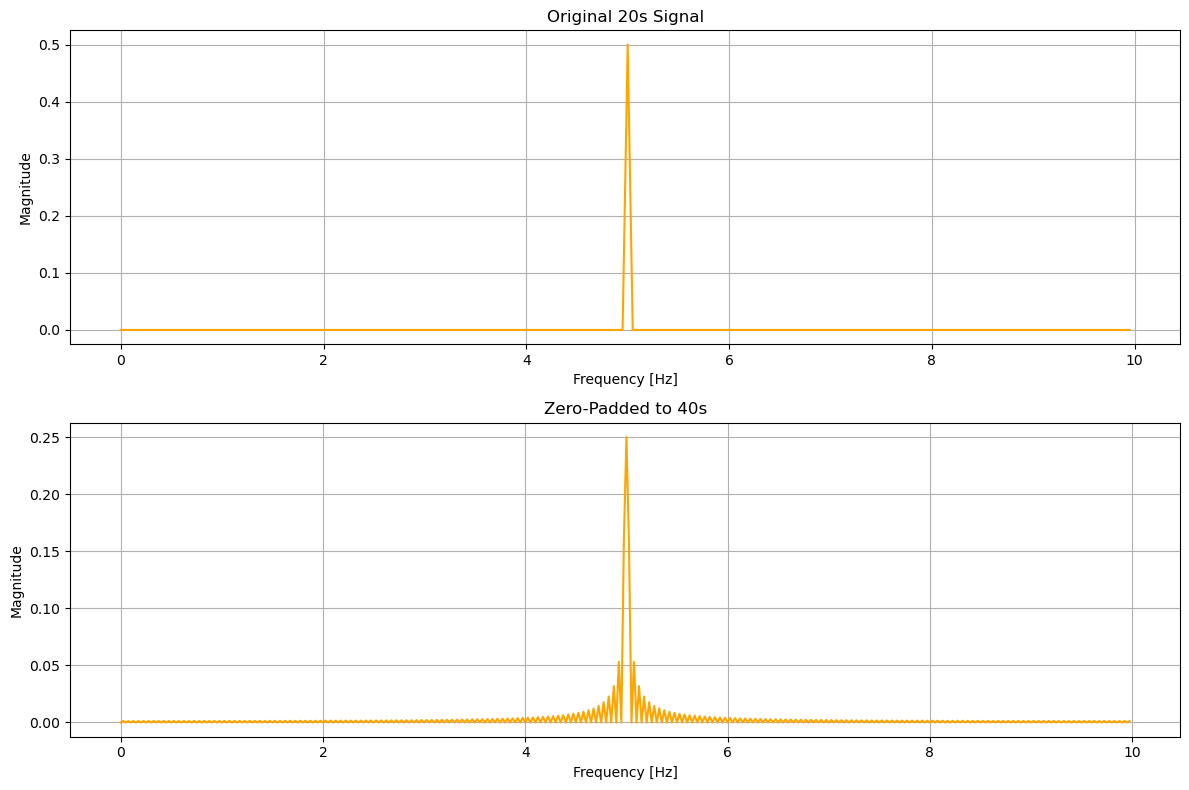

In [91]:
plt.figure(figsize=(12, 8))

# Subplot 1: Original 20s Signal
plt.subplot(2, 1, 1)
plt.plot(pos_freq, mag_y, color='orange')
plt.grid(True)
plt.title('Original 20s Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

# Subplot 2: Zero-Padded to 40s
plt.subplot(2, 1, 2)
plt.plot(pos_freq_zero_padded, mag_y_zero_padded, color='orange')
plt.grid(True)
plt.title('Zero-Padded to 40s')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

## Comments

### - Zero padding makes the frequency axis more detailed and smoother.
###   It increases the number of frequency bins in the FFT output, which means
###   the DFT samples the underlying Discrete-Time Fourier Transform (DTFT) more finely.
### - It doesn't create new frequencies or improve the actual frequency resolution
###   (which is determined by the original signal duration and sampling rate).
###   It essentially interpolates the spectrum, making peaks and details easier to see.
###   The underlying resolution is still limited by the original (non-padded) signal length.


## 3 - Moving Average Filter

### Signal frequency

In [92]:
f = 5 # Hz

### Define a function to generate a cosine wave with added Gaussian noise

In [93]:
def x(t):
    return np.cos(2 * np.pi * f * t) + np.random.randn(len(t)) # Generates a cosine wave with frequency f and adds random Gaussian noise.

### Source used to implement the moving average function:
### https://www.analog.com/media/en/technical-documentation/dsp-book/dsp_book_ch15.pdf (Conceptual understanding)
### The implementation below is a direct calculation of the moving average.

In [94]:
def moving_avg_filter(x_signal, window_size):
    """
    Applies a moving average filter to the input signal x_signal.
    x_signal: The input signal (numpy array).
    window_size: The number of points in the moving average window (must be odd for this symmetric implementation).
    Returns the filtered signal.
    """
    y_filtered = np.zeros(len(x_signal))
    # half_window determines how many points to look at on each side of the current point
    half_window = window_size // 2

    for i in range(len(x_signal)):
        current_sum = 0
        count = 0
        # Sum values within the window around the current point i
        for j in range(-half_window, half_window + 1):
            # Check for boundary conditions: ensure we are within the signal limits
            if 0 <= i + j < len(x_signal):
                current_sum += x_signal[i + j]
                count += 1
        # Calculate the average if count is not zero (to avoid division by zero at edges if not handled properly)
        if count > 0:
            y_filtered[i] = current_sum / count
        else: # Should not happen if window_size is reasonable and i is within bounds
            y_filtered[i] = x_signal[i]


    # A more efficient way to implement a moving average filter for large signals is using convolution:
    # window = np.ones(window_size) / window_size
    # y_filtered = np.convolve(x_signal, window, mode='same')
    # The loop implementation is for direct understanding of the averaging process.
    return y_filtered

### Define sampling parameters

In [95]:
fs = 100  # Sampling frequency in Hz
T = 2  # Signal duration in seconds
x_points = np.arange(0, T, 1/fs)  # Time points

### Generate the noisy signal

In [96]:
y_noisy = x(x_points)

### Define different window sizes for the moving average filter

In [97]:
N_values = [3, 11, 31] # Window sizes (number of points)
filtered_signals = {} # Dictionary to store filtered signals

### Apply the moving average filter for each window size


In [98]:
for N in N_values:
    filtered_signals[N] = moving_avg_filter(y_noisy, N)

## Plot results

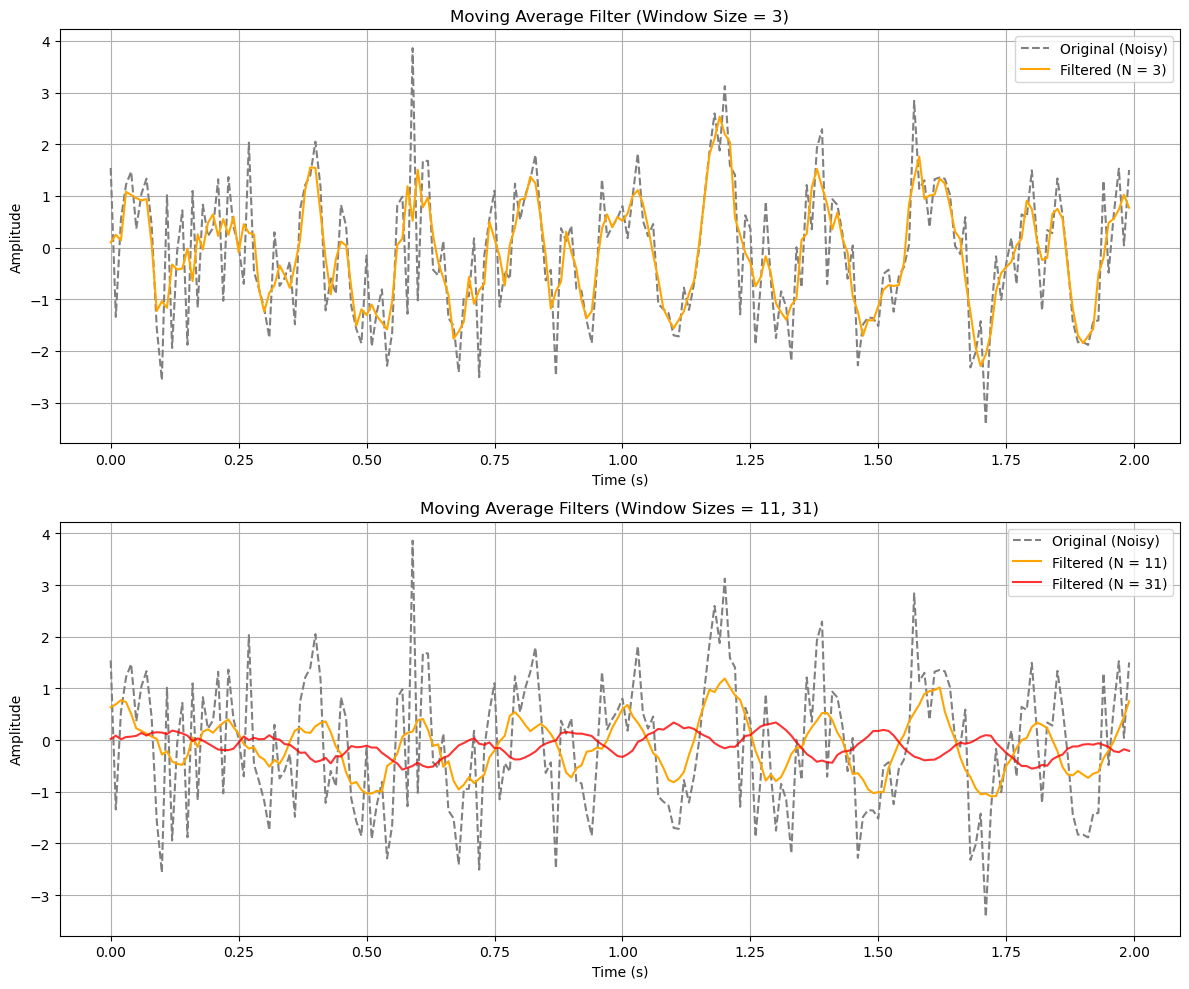

In [99]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(x_points, y_noisy, color="gray", linestyle="--",  label='Original (Noisy)')
plt.plot(x_points, filtered_signals[3], color='orange', label='Filtered (N = 3)')
plt.title('Moving Average Filter (Window Size = 3)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x_points, y_noisy, color="gray", linestyle="--",  label='Original (Noisy)')
plt.plot(x_points, filtered_signals[11], color='orange', label='Filtered (N = 11)')
plt.plot(x_points, filtered_signals[31], color='red', alpha=0.8, label='Filtered (N = 31)')
plt.title('Moving Average Filters (Window Sizes = 11, 31)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Frequency response of moving average filters



### The frequency response of a filter describes how the filter affects different frequency components of a signal.
### For a moving average filter, the frequency response shows how different frequencies are affected.
### We use scipy.signal.freqz to compute this from the impulse response h = [1/N, 1/N, ..., 1/N].

## Calculate and Plot the frequency response of the moving average filter

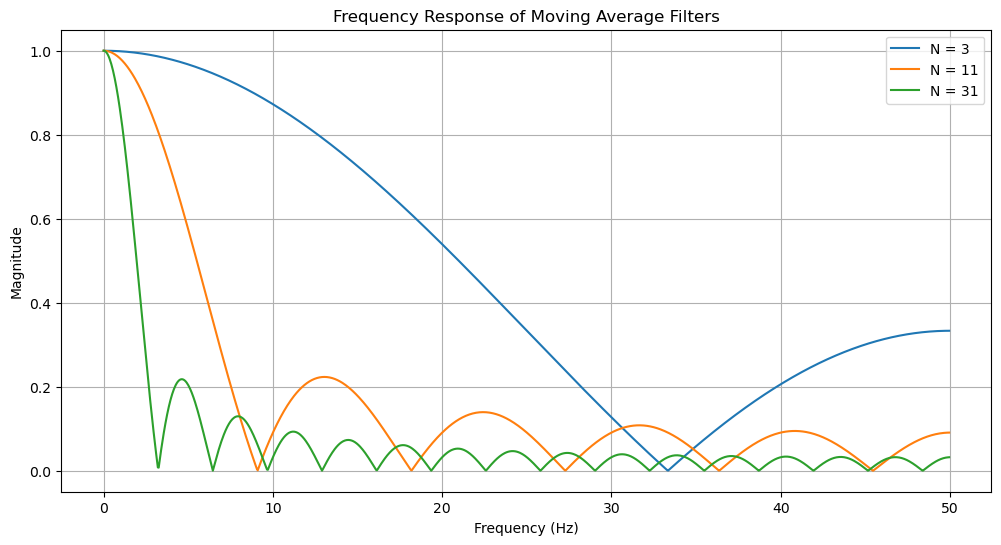

In [100]:

plt.figure(figsize=(12, 6))

for N in N_values:
    h = np.ones(N) / N  # impuls response of moving average filter
    w, H = sp.signal.freqz(h, worN=1000, fs=fs)  # Frequency response of the filter    
    plt.plot(w, np.abs(H), label=f'N = {N}')

plt.title('Frequency Response of Moving Average Filters')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

## Comments

### - The moving average filter is a simple low-pass Finite Impulse Response (FIR) filter.
###   It works by replacing each data point with the average of its neighboring data points
###   (including itself) within a defined window.
### - Effect of window size (N):
###   - Larger N: Results in a smoother signal because more points are averaged. This means
###     it's more effective at reducing high-frequency noise. However, it also causes
###     more attenuation of high-frequency components of the actual signal and can
###     introduce more lag or distortion (e.g., flattening of peaks, phase shift).
###   - Smaller N: Provides less smoothing and is less effective at noise reduction, but
###     it preserves the original signal features (like sharp changes or peaks) better
###     and introduces less lag.
### - The plots show that as N increases, the noise is significantly reduced, but the
###   amplitude of the 5 Hz cosine wave is also slightly attenuated, and the filtered
###   signal might appear to lag the original, or its peaks might be less sharp.

## 4 - A Custom FFT function

### Using Discrete Fourier Transform (DFT) Formula:
### X[k] = Σ(n=0 to N-1) x[n] * e^(-j2πkn/N), for k = 0, 1, ..., N-1
### 
### Where:
### - X[k]: Frequency domain representation at frequency bin k
### - x[n]: Time domain signal at sample n
### - N: Total number of samples
### - k: Frequency bin index (0 to N-1)
### - n: Time sample index (0 to N-1)
### - j: Imaginary unit (j^2 = -1 and j > 0 (on imaginary axis))

In [101]:
def custom_fft(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    
    for k in range(N):
        sum_val = 0
        for n in range(N):
            sum_val += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)
        X[k] = sum_val
    return X